## Tensor运算
1. basic
2. matmul
3. power
4. exp / log
5. approximation
6. clamp 裁剪

- basic // add, sub, mul, div (点乘)
- +, -, *, / = torch.add(),  .sub(),  .mul(),  .div()

In [10]:
import torch
a = torch.rand(3,4)
b = torch.ones(4)
print(a)
print(b)
print(a/b)
print(torch.div(a,b))

tensor([[0.8219, 0.4037, 0.1122, 0.8122],
        [0.9528, 0.8821, 0.7490, 0.9249],
        [0.0260, 0.3189, 0.8989, 0.4487]])
tensor([1., 1., 1., 1.])
tensor([[0.8219, 0.4037, 0.1122, 0.8122],
        [0.9528, 0.8821, 0.7490, 0.9249],
        [0.0260, 0.3189, 0.8989, 0.4487]])
tensor([[0.8219, 0.4037, 0.1122, 0.8122],
        [0.9528, 0.8821, 0.7490, 0.9249],
        [0.0260, 0.3189, 0.8989, 0.4487]])


- torch.matmul = @ (矩阵乘法)

In [15]:
a = torch.tensor([[2, 2],[2,2]])
b = torch.tensor([[3, 3],[3,3]])
print(a@b)
torch.matmul(a, b)

tensor([[12, 12],
        [12, 12]])


tensor([[12, 12],
        [12, 12]])

In [17]:
# example 将打平后尺寸为784的图片按特征w缩小成512
img = torch.rand(4, 784)
w = torch.rand(512, 784) # 默认 (ch_out, ch-in)
(torch.matmul(img, w.t())).shape

torch.Size([4, 512])

In [20]:
a = torch.rand(2,2,3) # 运用了广播机制
b = torch.rand(2,3,3)
torch.matmul(a, b)  # 高纬矩阵matmul取最后两维

tensor([[[0.9829, 1.1947, 0.8675],
         [0.7937, 0.7820, 0.3444]],

        [[0.6461, 0.3683, 0.2495],
         [0.5357, 0.7048, 0.6567]]])

- power次方
- sqrt 平方根
- rsqrt 平方根倒数

In [28]:
a = torch.full([2,2], 3)
a.pow(2)
print(a**2)
aa = a.pow(2)
print(aa**(0.5))  
print(aa.sqrt())

tensor([[9, 9],
        [9, 9]])
tensor([[3., 3.],
        [3., 3.]])
tensor([[3., 3.],
        [3., 3.]])


- exp / log

In [34]:
a = torch.exp(torch.ones(2, 2)) # e**1
print(a)
print(torch.log(a))
torch.log10(a)

tensor([[2.7183, 2.7183],
        [2.7183, 2.7183]])
tensor([[1.0000, 1.0000],
        [1.0000, 1.0000]])


tensor([[0.4343, 0.4343],
        [0.4343, 0.4343]])

- approximation

In [36]:
a = torch.tensor(3.14)
a.floor(), a.ceil(), a.trunc(), a.frac() # 下取整，上取整，裁剪整数和小数部分

(tensor(3.), tensor(4.), tensor(3.), tensor(0.1400))

In [38]:
a.round() # 四舍五入

tensor(3.)

- clamp 裁剪 （梯度裁剪）

In [40]:
grad = torch.rand(2, 3)*15
print(grad)
grad.max(), grad.median()

tensor([[10.4875, 13.1344,  7.1528],
        [13.6852,  7.8223,  0.6311]])


(tensor(13.6852), tensor(7.8223))

In [41]:
print(grad.clamp(10)) # clamp(min)
print(grad.clamp(1, 10)) # clamp(min, max)

tensor([[10.4875, 13.1344, 10.0000],
        [13.6852, 10.0000, 10.0000]])
tensor([[10.0000, 10.0000,  7.1528],
        [10.0000,  7.8223,  1.0000]])


## Tensor统计属性
1. norm 范数
2. mean, sum, prod, max, min, argmin, argmax  均值，求和，累乘，最大最小值，和其位置
3. dim / keepdim
4. kthvalue, topk 第几个，top几
5. compare

- norm范数

In [45]:
a = torch.full([8], 1.)
b = a.reshape(2, 4)
c = a.reshape(2, 2, 2)
a.norm(1), b.norm(1), c.norm(1) # 1范数

(tensor(8.), tensor(8.), tensor(8.))

In [46]:
c.norm(1, dim=0), c.norm(2, dim=0) # 指定维度求1范数和2范数，取哪位维度的范数，那个维度就会消掉

(tensor([[2., 2.],
         [2., 2.]]),
 tensor([[1.4142, 1.4142],
         [1.4142, 1.4142]]))

- mean, sum, min, max, prod

In [55]:
a = torch.rand(8).reshape(2,4).float()
print(a)
a.min(), a.max(), a.mean(), a.prod(), a.sum()

tensor([[0.0384, 0.4683, 0.8544, 0.0102],
        [0.8306, 0.4593, 0.3114, 0.8692]])


(tensor(0.0102),
 tensor(0.8692),
 tensor(0.4802),
 tensor(1.6122e-05),
 tensor(3.8417))

In [56]:
a.argmax(), a.argmin(), a.argmax(dim=1), a.argmin(dim=1) 

(tensor(7), tensor(3), tensor([2, 3]), tensor([3, 2]))

- dim , keepdim

In [60]:
a = torch.randn(4, 10)
a # 四张图片每张图片的0-9数字预测得分

tensor([[ 1.0246,  0.4948,  0.7048,  1.0711,  0.0330,  0.4049,  0.9061, -0.4439,
          1.3457, -0.2067],
        [-1.1904,  0.2203, -0.8998, -0.8697,  0.8421, -0.0474,  1.4846, -0.1882,
         -0.9556,  1.9278],
        [-0.8419, -2.4793,  1.3796, -0.2264, -0.4996,  1.4339, -0.0412, -2.6355,
         -2.5705, -0.1786],
        [ 0.8968,  0.1510, -1.1726,  0.4311,  0.6922, -2.0489,  0.8118,  0.8940,
         -0.1432, -1.5920]])

In [63]:
print(a.max(dim=1)) # 得出四张照片的预测值
a.max(dim=1, keepdim=True) # 保持维度形状

torch.return_types.max(
values=tensor([1.3457, 1.9278, 1.4339, 0.8968]),
indices=tensor([8, 9, 5, 0]))


torch.return_types.max(
values=tensor([[1.3457],
        [1.9278],
        [1.4339],
        [0.8968]]),
indices=tensor([[8],
        [9],
        [5],
        [0]]))

- Top-k, k-th
- topk: 预测值取k个概率最大的值和索引
- .kthvalue(n) # 第n小的数

In [65]:
a.topk(3, dim=1) # 最大的3个
a.topk(3, dim=1, largest=False) # 最小的3个
a.kthvalue(8, dim=1) # 第八小

torch.return_types.kthvalue(
values=tensor([ 1.0246,  0.8421, -0.0412,  0.8118]),
indices=tensor([0, 4, 6, 6]))

- compare比较
- $>, >=, <, <=, !=, ==$
- torch.equal(a,b)

## Tensor高阶OP
1. where
2. gather

- where
- torch.where(cond, a, b)
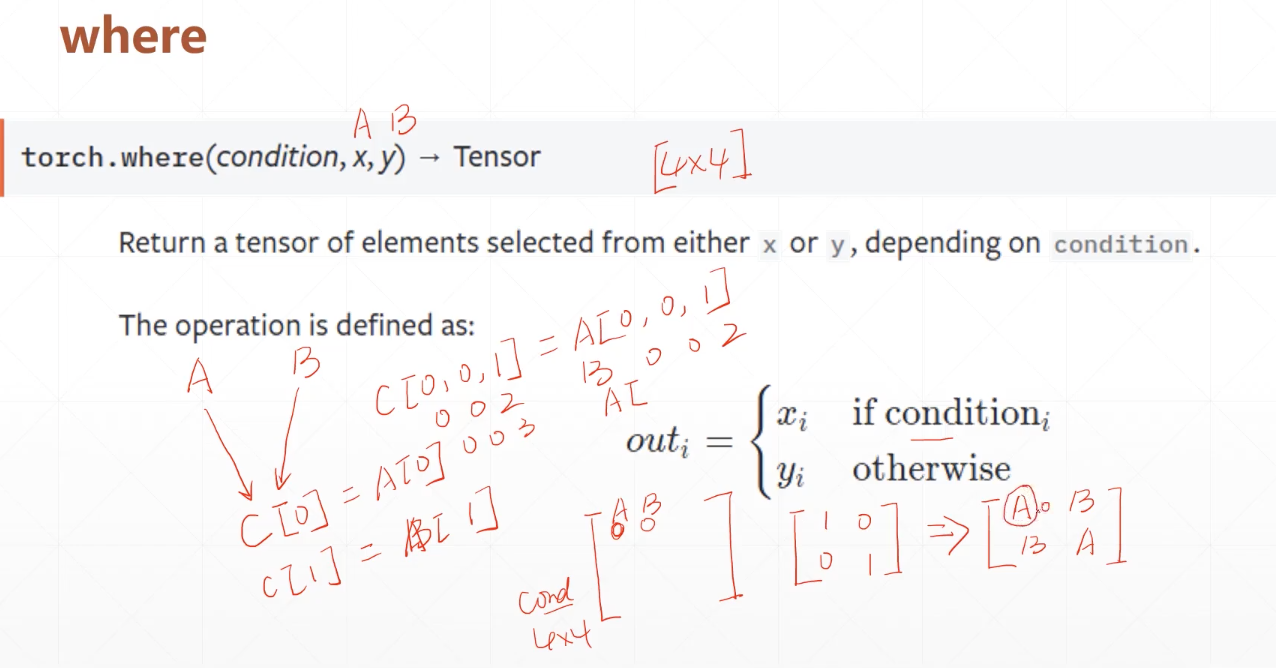

In [68]:
cond = torch.tensor([[0.6,0.7], [0.8,0.4]])
a = torch.ones(2, 2)
b = torch.zeros(2, 2)
torch.where(cond>0.5, a, b)

tensor([[1., 1.],
        [1., 0.]])

- gather 收集查表
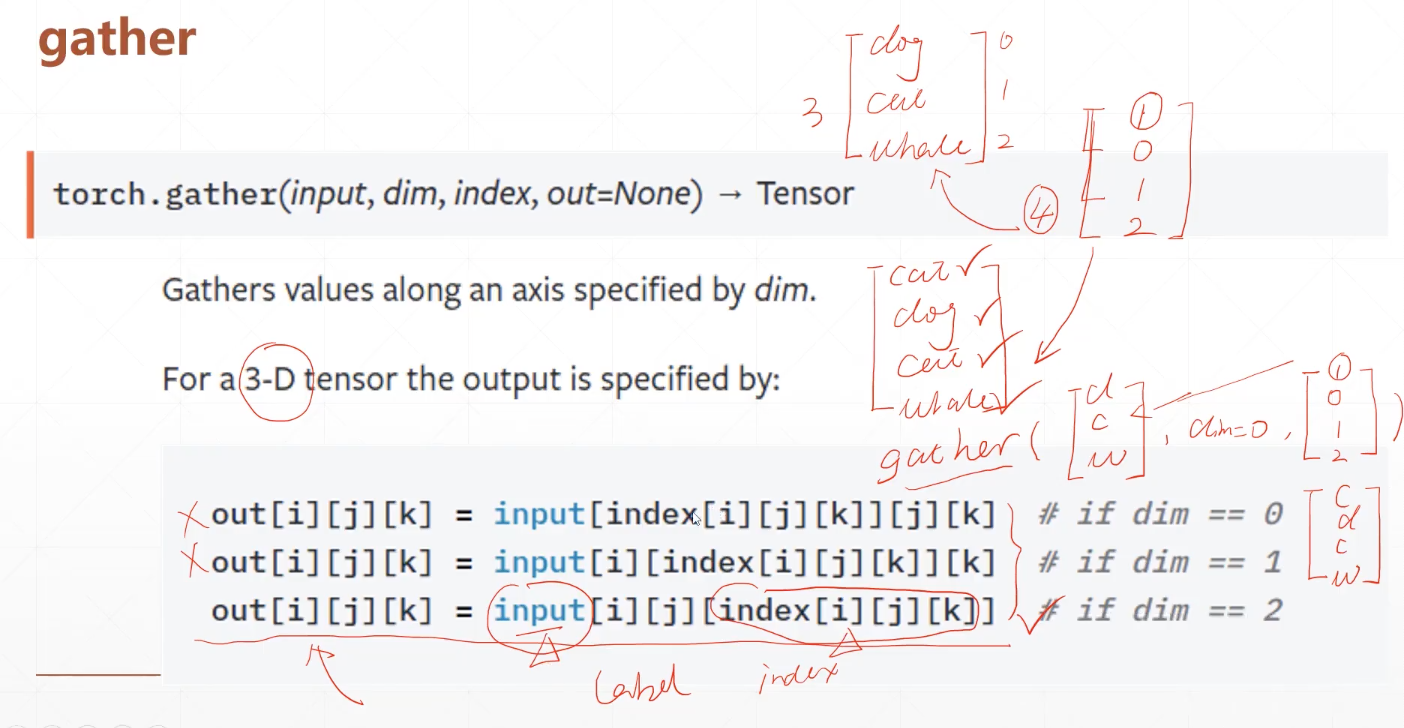

In [80]:
prob = torch.randn(4, 10)
idx = prob.topk(dim=1, k=3)
idx

torch.return_types.topk(
values=tensor([[1.3844, 1.2402, 0.8932],
        [1.7244, 1.2027, 0.3315],
        [0.7396, 0.2783, 0.2742],
        [1.8623, 1.4784, 0.7416]]),
indices=tensor([[9, 8, 3],
        [2, 3, 7],
        [6, 0, 9],
        [7, 0, 1]]))

In [86]:
label = torch.tensor([100., 101., 102., 103., 104., 105., 106., 107., 108., 109.])
torch.gather(label.expand(4,10), dim=1, index=idx)

TypeError: gather() received an invalid combination of arguments - got (Tensor, index=torch.return_types.topk, dim=int), but expected one of:
 * (Tensor input, name dim, Tensor index, *, bool sparse_grad, Tensor out)
 * (Tensor input, int dim, Tensor index, *, bool sparse_grad, Tensor out)
